In [1]:
library(ISLR)

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


**Scaling the Data**

In [5]:
stand.features <- scale(iris[1:4])
print(var(stand.features))

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000


In [6]:
final.data <- cbind(stand.features,iris[5])

**Train Test Splits**

In [7]:
set.seed(101)
library(caTools)

In [8]:
sample <- sample.split(final.data$Species, SplitRatio = 0.7)

In [9]:
train <-subset(final.data,sample==T)

In [10]:
test <- subset(final.data,sample==F)

# KNN

In [11]:
library(class)

In [17]:
predicted.species <-knn(train[1:4],test[1:4],train$Species,k=1)

In [20]:
print(predicted.species)

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica


In [22]:
print(mean(test$Species != prected.species))
# 4.44% misclassfied result

[1] 0.04444444


**Choosing a K Value** 

In [23]:
predicted.species <-NULL
error.rate <- NULL

In [35]:
for (i in 1:20){
    set.seed(101)
    predicted.species <- knn(train[1:4],test[1:4], train$Species,k=i)
    error.rate[i] <- mean(test$Species != predicted.species)
}

In [37]:
print(error.rate)

 [1] 0.04444444 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
 [7] 0.06666667 0.06666667 0.04444444 0.02222222 0.02222222 0.02222222
[13] 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
[19] 0.02222222 0.02222222


**Plotting for Elbow Method**
 - We can plot out the various error rates for the K values. We should see an "elbow" indicating that we don't get a decrease in error rate for using a higher K.

In [25]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [26]:
k.values <-1:10
error.df <-data.frame(error.rate,k.values)

In [38]:
error.df

error.rate,k.values
0.04444444,1
0.02222222,2
0.02222222,3
0.02222222,4
0.02222222,5
0.02222222,6
0.06666667,7
0.06666667,8
0.04444444,9
0.02222222,10


In [39]:
pl <- ggplot(error.df,aes(x=k.values,y=error.rate))+ geom_point()
pl <- pl + geom_line(lty= 'dotted',color = 'red',size=1)

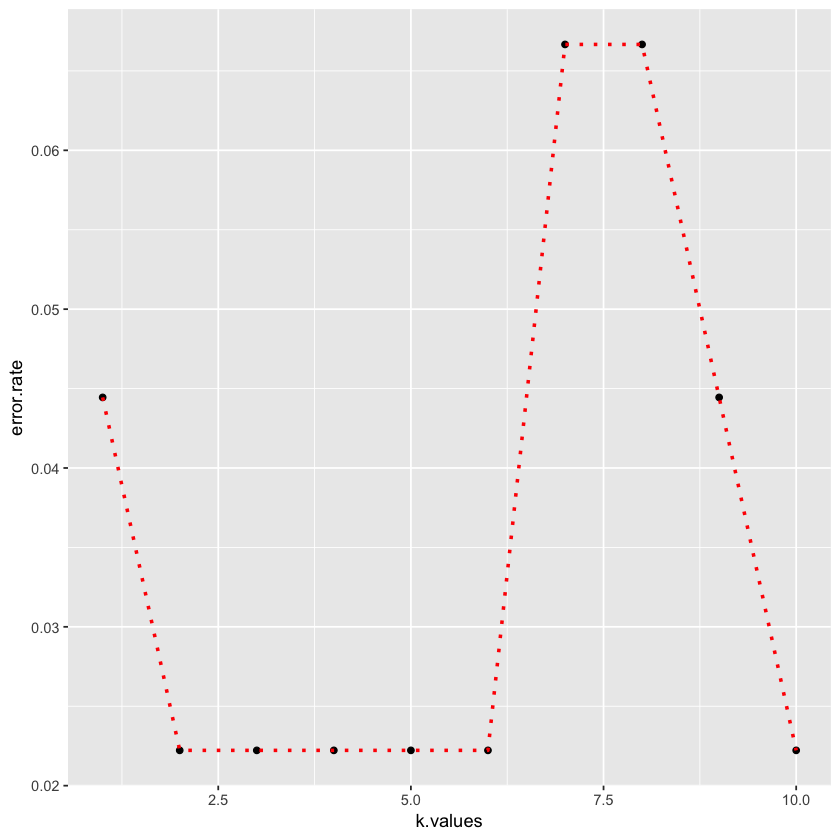

In [40]:
pl

**Error rate drops down when K is inreased from 1 to 2. And Optimal K value should be 3 or 4** 